In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import glob
from sklearn.metrics import roc_curve, auc

In [ ]:
# Merge excel file 
# for index, file in enumerate(glob.glob("result/data_set/*.csv")):
#     print(index, file)

framereate = 30 # fps
for index, file in enumerate(glob.glob("result/data_set/*.csv")):
    print(file)
    name = file[15:34]
    dataset = pd.read_csv(file)
    dataset = dataset.drop(columns=['Unnamed: 0', 'safe_zone_p0_x','safe_zone_p0_y','safe_zone_p1_x','safe_zone_p1_y','safe_zone_p2_x','safe_zone_p2_y','safe_zone_p3_x','safe_zone_p3_y'])
    
    # 6/30 = 0.2 ms
    # new_columns = ['frame_cnt', 'self_speed', 'detected_car_nums', 'short_distance_car_p0_x',
    #        'short_distance_car_p0_y', 'short_distance_car_p1_x',
    #        'short_distance_car_p1_y', 'short_distance_car_p2_x',
    #        'short_distance_car_p2_y', 'short_distance_car_p3_x',
    #        'short_distance_car_p3_y',
    #        'self_speed2', 'detected_car_nums2', 'short_distance_car_p0_x2',
    #        'short_distance_car_p0_y2', 'short_distance_car_p1_x2',
    #        'short_distance_car_p1_y2', 'short_distance_car_p2_x2',
    #        'short_distance_car_p2_y2', 'short_distance_car_p3_x2',
    #        'short_distance_car_p3_y2',
    #        'self_speed3', 'detected_car_nums3', 'short_distance_car_p0_x3',
    #        'short_distance_car_p0_y3', 'short_distance_car_p1_x3',
    #        'short_distance_car_p1_y3', 'short_distance_car_p2_x3',
    #        'short_distance_car_p2_y3', 'short_distance_car_p3_x3',
    #        'short_distance_car_p3_y3',
    #        'self_speed4', 'detected_car_nums4', 'short_distance_car_p0_x4',
    #        'short_distance_car_p0_y4', 'short_distance_car_p1_x4',
    #        'short_distance_car_p1_y4', 'short_distance_car_p2_x4',
    #        'short_distance_car_p2_y4', 'short_distance_car_p3_x4',
    #        'short_distance_car_p3_y4',
    #        'self_speed5', 'detected_car_nums5', 'short_distance_car_p0_x5',
    #        'short_distance_car_p0_y5', 'short_distance_car_p1_x5',
    #        'short_distance_car_p1_y5', 'short_distance_car_p2_x5',
    #        'short_distance_car_p2_y5', 'short_distance_car_p3_x5',
    #        'short_distance_car_p3_y5','label'
    #               ],

    df = pd.DataFrame()

    for index in range(0, len(dataset)-30*2): # 2 secoonds
        temp0 = dataset.iloc[0*12+index, :]
        temp0 = temp0.drop('label')

        temp1 = dataset.iloc[1*12+index, :]
        temp1 = temp1.drop('label')

        temp1 = temp1.rename({'frame_cnt'        :'frame_cnt_1', 
            'self_speed'             :'self_speed_1', 
            'detected_car_nums'      :'detected_car_nums_1', 
            'short_distance_car_p0_x':'short_distance_car_p0_x_1',
            'short_distance_car_p0_y':'short_distance_car_p0_y_1', 
            'short_distance_car_p1_x':'short_distance_car_p1_x_1',
            'short_distance_car_p1_y':'short_distance_car_p1_y_1',
            'short_distance_car_p2_x':'short_distance_car_p2_x_1',
            'short_distance_car_p2_y':'short_distance_car_p2_y_1',
            'short_distance_car_p3_x':'short_distance_car_p3_x_1',
            'short_distance_car_p3_y':'short_distance_car_p3_y_1'})

        temp1 = temp0.combine(temp1, max, fill_value=-1)

        temp2 = dataset.iloc[2*12+index, :]
        temp2 = temp2.drop('label')
        temp2 = temp2.rename({'frame_cnt'        :'frame_cnt_2', 
            'self_speed'             :'self_speed_2', 
            'detected_car_nums'      :'detected_car_nums_2', 
            'short_distance_car_p0_x':'short_distance_car_p0_x_2',
            'short_distance_car_p0_y':'short_distance_car_p0_y_2', 
            'short_distance_car_p1_x':'short_distance_car_p1_x_2',
            'short_distance_car_p1_y':'short_distance_car_p1_y_2',
            'short_distance_car_p2_x':'short_distance_car_p2_x_2',
            'short_distance_car_p2_y':'short_distance_car_p2_y_2',
            'short_distance_car_p3_x':'short_distance_car_p3_x_2',
            'short_distance_car_p3_y':'short_distance_car_p3_y_2'})

        temp2 = temp1.combine(temp2, max, fill_value=-1)

        temp3 = dataset.iloc[3*12+index, :]
        temp3 = temp3.drop('label')
        temp3 = temp3.rename({'frame_cnt'        :'frame_cnt_3', 
            'self_speed'             :'self_speed_3', 
            'detected_car_nums'      :'detected_car_nums_3', 
            'short_distance_car_p0_x':'short_distance_car_p0_x_3',
            'short_distance_car_p0_y':'short_distance_car_p0_y_3', 
            'short_distance_car_p1_x':'short_distance_car_p1_x_3',
            'short_distance_car_p1_y':'short_distance_car_p1_y_3',
            'short_distance_car_p2_x':'short_distance_car_p2_x_3',
            'short_distance_car_p2_y':'short_distance_car_p2_y_3',
            'short_distance_car_p3_x':'short_distance_car_p3_x_3',
            'short_distance_car_p3_y':'short_distance_car_p3_y_3'})

        temp3 = temp2.combine(temp3, max, fill_value=-1)

        temp4 = dataset.iloc[4*12+index, :]
        # temp4 = temp4.drop('label')
        temp4 = temp4.rename({'frame_cnt'        :'frame_cnt_4', 
            'self_speed'             :'self_speed_4', 
            'detected_car_nums'      :'detected_car_nums_4', 
            'short_distance_car_p0_x':'short_distance_car_p0_x_4',
            'short_distance_car_p0_y':'short_distance_car_p0_y_4', 
            'short_distance_car_p1_x':'short_distance_car_p1_x_4',
            'short_distance_car_p1_y':'short_distance_car_p1_y_4',
            'short_distance_car_p2_x':'short_distance_car_p2_x_4',
            'short_distance_car_p2_y':'short_distance_car_p2_y_4',
            'short_distance_car_p3_x':'short_distance_car_p3_x_4',
            'short_distance_car_p3_y':'short_distance_car_p3_y_4'})

        temp4 = temp3.combine(temp4, max, fill_value=-1)

        column= []
        data = []
        for i in range(len(temp4)):
            column.append(temp4.index[i])
            data.append(temp4[i])

        data = [tuple(data)]
        df_temp = pd.DataFrame(data, columns=column)
        df = df.append(df_temp)
        
    df.to_csv("result/merge_data_set/{0}.csv".format(name), index = False)



result/data_set/FILE190812-134902F.csv
result/data_set/FILE190811-115845F.csv
result/data_set/FILE190810-110332F.csv


In [ ]:
import glob
import pandas as pd

df = pd.DataFrame()
for index, file in enumerate(glob.glob("result/merge_data_set/*.csv")):
    dataset = pd.read_csv(file)
    df = df.append(dataset)
df.to_csv("result/merge_data_set/merge.csv", index = False)

In [4]:
320/322


0.9937888198757764

In [ ]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
%matplotlib inline


In [2]:
7/90

0.07777777777777778

In [212]:
dataset = pd.read_csv("result/merge_data_set/merge.csv")

labels = dataset['label']
df = dataset.drop(columns=['label'])


random_seed = 5 # set seed for same train test data split
x_train, x_test, y_train, y_test = train_test_split(df, labels,
                                                    random_state=random_seed,
                                                   )


In [226]:
clf = RandomForestClassifier(n_estimators=350)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [227]:
# Prediction by locao data
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)
#print(df_result["class"])

0.9994289793004997

In [228]:
confustion_matrix = confusion_matrix(y_test, y_pred)
print(confustion_matrix)

[[13123     0     0]
 [    0   796     1]
 [    0     7    83]]


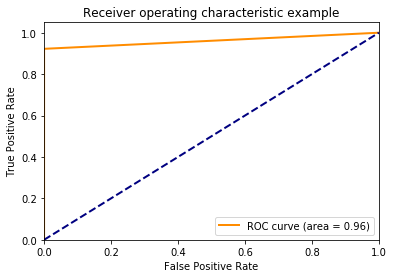

In [235]:
# ROC
roc_y_test = y_test
roc_y_test[roc_y_test == 1]=0
roc_y_test[roc_y_test == 2]=1

roc_y_pred = y_pred
roc_y_pred[roc_y_pred == 1]=0
roc_y_pred[roc_y_pred == 2]=1


fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt

fig = plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
#fig.savefig('/tmp/roc.png')
plt.show()